In [40]:
import pandas as pd
import math
import datetime
from datetime import datetime
from datetime import date
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pickle


In [76]:
mat_training_0 = loadtxt("Train1.txt", delimiter="  ", unpack=False)
mat_training_1 = loadtxt("Train2.txt", delimiter="  ", unpack=False)
mat_testing_0 = loadtxt("Test1.txt", delimiter="  ", unpack=False)
mat_testing_1 = loadtxt("Test2.txt", delimiter="  ", unpack=False)

#only has two features and can add more by concatenation and is to test a example model
X_train = np.concatenate((mat_training_0,mat_training_1), axis=0)

print(X_train.shape)
X_test = np.concatenate((mat_testing_0,mat_testing_1), axis=0)

(4000, 2)


In [42]:
labels_0_tr = np.array([1]*mat_training_0.shape[0])
labels_1_tr = np.array([2]*mat_training_1.shape[0])
labels_0_te = np.array([1]*mat_testing_0.shape[0])
labels_1_te = np.array([2]*mat_testing_1.shape[0])


#the testing classes are grouped under one vector
y_test = np.concatenate((labels_0_te,labels_1_te), axis=0)
y_train = np.concatenate((labels_0_tr,labels_1_tr), axis=0)

print(y_train)

[1 1 1 ... 2 2 2]


In [43]:
#  Data=[list1,list2]
#  X = Data[0]
#  y = Data[1],
#X = [[0, 0], [1, 1]]
#y = [0, 1] 
#y = [0,0,0,0,0]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.43, random_state=0)
pca = PCA(n_components=2)# adjust yourself
pca.fit(X_train)
pca.fit(X_test)


X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

clf = SVC()
clf.fit(X_t_train, y_train)
print('score', clf.score(X_t_test, y_test))
#print('pred label', clf.predict(X_t_test))

with open ('model_pickle', 'wb') as filename:
   pickle.dump(clf,filename)

score 0.829


In [44]:
with open ('model_pickle', 'rb') as filename:
   modelRetrieved = pickle.load(filename)

In [45]:
modelRetrieved.fit(X_t_train, y_train)
print('score', modelRetrieved.score(X_t_test, y_test))

score 0.829


In [46]:
#model testing above works to 82% need to be tuned for new data with greater amount of columns
#pca is performed and a sample model is trained and the model is saved as variable then retrieved

In [47]:
#creating the matrix with labels below

In [48]:
filename1 = pd.read_excel('CGMData670GPatient3.xlsx')
filename2 = pd.read_excel('InsulinAndMealIntake670GPatient3.xlsx')

In [49]:
#print(filename2.Index[0])
CGMData_pre = []
InsulinData_pre = []

eatingBehavior = filename1['Sensor Glucose (mg/dL)'].to_numpy()
ISIG = filename1['ISIG Value'].to_numpy()
CGMDate = filename1['Date'].to_numpy()
CGMTime = filename1['Time'].to_numpy()


Eats =  filename2['BWZ Carb Input (grams)'].to_numpy()
InsulinDate = filename2['Date'].to_numpy()
InsulinTime = filename2['Time'].to_numpy()

In [50]:
InsulinTimeAfter = []
for i in InsulinTime:
    arr = []
    arr.append(int(str(i).split(':',3)[0]))
    arr.append(int(str(i).split(':',3)[1]))
    arr.append(int(str(i).split(':',3)[2]))
    InsulinTimeAfter.append(arr)
    
CGMTimeAfter = []
for i in CGMTime:
    arr = []
    arr.append(int(str(i).split(':',3)[0]))
    arr.append(int(str(i).split(':',3)[1]))
    arr.append(int(str(i).split(':',3)[2]))
    CGMTimeAfter.append(arr)


InsulinDateAfter = []
for i in InsulinDate:
    arr = []
    var = pd.to_datetime(i)
    q= str(var).split()
    arr.append(int(q[0].split('-',3)[0]))
    arr.append(int(q[0].split('-',3)[1]))
    arr.append(int(q[0].split('-',3)[2]))
    InsulinDateAfter.append(arr)
    
    
CGMDateAfter = []
for i in CGMDate:
    arr = []
    var = pd.to_datetime(i)
    q= str(var).split()
    arr.append(int(q[0].split('-',3)[0]))
    arr.append(int(q[0].split('-',3)[1]))
    arr.append(int(q[0].split('-',3)[2]))
    CGMDateAfter.append(arr)



In [51]:
print(CGMDateAfter[0])
print(InsulinDateAfter[0])

[2018, 3, 7]
[2018, 3, 7]


In [52]:
DateandTime = []
for i in range(0, len(InsulinDateAfter),1):
    arr = []
    arr.append(InsulinDateAfter[i])
    arr.append(InsulinTimeAfter[i])
    DateandTime.append(arr)
    
    
CGMDateandTime = []
for i in range(0, len(CGMDateAfter),1):
    arr = []
    arr.append(CGMDateAfter[i])
    arr.append(CGMTimeAfter[i])
    CGMDateandTime.append(arr)

In [53]:
print(DateandTime[0])
print(CGMDateandTime[0])

[[2018, 3, 7], [11, 36, 15]]
[[2018, 3, 7], [11, 30, 48]]


In [54]:
DateAndFood = []
for i in range(0, len(DateandTime),1):
    arr = []
    arr.append(DateandTime[i])
    arr.append(Eats[i])
    DateAndFood.append(arr)
    
DateAndFood = DateAndFood[::-1]


CGMDateAndFood = []
for i in range(0, len(CGMDateandTime),1):
    arr = []
    arr.append(CGMDateandTime[i])
    arr.append(eatingBehavior[i])
    arr.append(ISIG[i])
    CGMDateAndFood.append(arr)
    
CGMDateAndFood = CGMDateAndFood[::-1]

In [55]:
print(DateAndFood[0])
print(CGMDateAndFood[0])

[[[2017, 9, 5], [8, 25, 33]], nan]
[[[2017, 9, 5], [10, 46, 21]], 182.0, 30.61]


In [56]:
DataClean = []
for i in DateAndFood:
    arr = []
    empty = math.isnan(i[1])
    if i[1] > 0 and empty == False:
        arr.append(i[0])
        arr.append(i[1])  
        DataClean.append(arr)

In [57]:
#data has been processed

In [58]:
def separateDate(Data,CGM,meal,noMeal,memoize,position):
    
    diff_in_hours = 0
    index = 0
        
    lowerYear = Data[0][0]
    lowerMonth = Data[0][1]
    lowerDay = Data[0][2]
    
        
    lowerHour = Data[1][0]
    lowerMinute = Data[1][1]
    lowerSecond = Data[1][2]
    
    date_1 = str(lowerDay) + '/'+ str(lowerMonth) +'/'+ str(lowerYear) + ' ' +str(lowerHour)+':'+ str(lowerMinute)+':'+ str(lowerSecond)
    date_format_str = '%d/%m/%Y %H:%M:%S'
    start = datetime.strptime(date_1, date_format_str)
    
    
    empty = False 
    considerStretch = False
    memoizationValue = False
    
    for i in range(memoize, len(CGM), 1):
        
        ########################################################################3
        positionYear = position[0][0]
        positionMonth = position[0][1]
        positionDay = position[0][2]


        positionHour = position[1][0]
        positionMinute = position[1][1]
        positionSecond = position[1][2]

        date_3 = str(positionDay) + '/'+ str(positionMonth) +'/'+ str(positionYear) + ' ' +str(positionHour)+':'+ str(positionMinute)+':'+ str(positionSecond)
        memoizationDate = datetime.strptime(date_3, date_format_str)
        
        
        
        
        ##########################################################################
        
        upperYear = CGM[i][0][0][0]
        upperMonth = CGM[i][0][0][1]
        upperDay = CGM[i][0][0][2]

        upperHour = CGM[i][0][1][0]
        upperMinute = CGM[i][0][1][1]
        upperSecond = CGM[i][0][1][2]

        date_2 = str(upperDay) + '/'+ str(upperMonth) +'/'+ str(upperYear) + ' ' +str(upperHour)+':'+ str(upperMinute)+':'+ str(upperSecond)

        end =   datetime.strptime(date_2, date_format_str)
        # Get interval between two timstamps as timedelta object
        
        
        diff = end - start
        # Get interval between two timstamps in hours
        diff_in_hours = diff.total_seconds() / 3600

        #############################################################################
        if diff_in_hours >= 0 and diff_in_hours < 2:
            temp = math.isnan(CGM[i][1])
            if temp == True:
                empty = True
        
        
        if diff_in_hours >= 2 and diff_in_hours <= 4 and empty == True:
            noMeal.append(CGM[i])
            
        if diff_in_hours >= 0 and diff_in_hours < 2 and empty == True:
            meal.append(CGM[i])
            
        if diff_in_hours >= 0 and diff_in_hours < 2 and empty == False:
            considerStretch = True
            
        if diff_in_hours >= 1.5 and diff_in_hours <= 4 and considerStretch == True:
            meal.append(CGM[i])
            
            
        if end >= memoizationDate:
            index = i - 1
            break
            


            
    return int(index)
           
           

        

In [59]:
print(len(DataClean))
print(len(CGMDateAndFood))

424
33248


In [60]:
meal = []
noMeal = []
memoize = 0

for i in range(0, len(DataClean), 1):
    
    if i < len(DataClean) - 1:
        memoize = separateDate(DataClean[i][0],CGMDateAndFood,meal,noMeal, memoize, DataClean[i+1][0])

In [93]:
print(len(meal))
print(len(noMeal))
print(meal[0])

array = []
for i in meal:
    temp = math.isnan(i[1])
    temp1 = math.isnan(i[2])

    if temp == False and temp1 == False:
        arr = []
        arr.append(i[1])
        arr.append(i[2])
        array.append(arr)
    
    
array1 = []
for i in noMeal:
    temp = math.isnan(i[1])
    temp1 = math.isnan(i[2])

    if temp == False and temp1 == False:
        arr = []
        arr.append(i[1])
        arr.append(i[2])
        array1.append(arr)

    

    

10478
986
[[[2017, 9, 5], [14, 46, 21]], 160.0, 34.55]


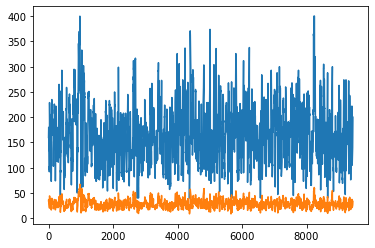

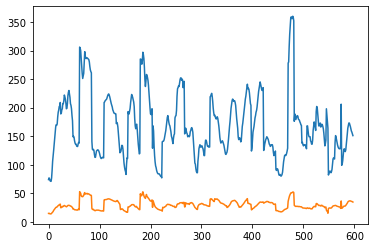

In [136]:
import matplotlib.pyplot as plt
plt.plot(range(len(array)),array)

plt.show()
plt.plot(range(len(array1)),array1)
plt.show()


In [135]:
#print(var)

In [126]:
array = np.array(array)
array1 = np.array(array1)

print(np.any(np.isnan(array)))
print(np.any(np.isnan(array1)))

X_train = np.concatenate((array,array1), axis=0)


labels_0_tr = np.array([1]*array.shape[0])
labels_1_tr = np.array([2]*array1.shape[0])

#the testing classes are grouped under one vector
y_train = np.concatenate((labels_0_tr,labels_1_tr), axis=0)


False
False


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.25)

print(X_train.shape)

pca = PCA(n_components=2)# adjust yourself
pca.fit(X_train)

pca.fit(X_test)


X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

clf = SVC()
print(y_test)
clf.fit(X_t_train, y_train)
print('score', clf.score(X_t_test, y_test))
print('pred label', clf.predict(X_t_test))


(1139, 2)
[2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
score 0.9473684210526315
pred label [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1